In [28]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [29]:
def ARNOLDI(A,x1,m):
    n=np.shape(A)[0]
    Q=np.zeros((n,m+1))
    H=np.zeros((m+1,m))
    Q[:,0]=x1/np.linalg.norm(x1,2)
    for i in range(0,m):
        w=A@Q[:,i]
        for j in range(0,i+1):
            H[j,i]=np.dot(Q[:,j],w)
            w=w-H[j,i]*Q[:,j]
        H[i+1,i]=np.linalg.norm(w,2)
        if H[i+1,i]==0:return Q,H
        Q[:,i+1]=w/H[i+1,i]
    return Q,H

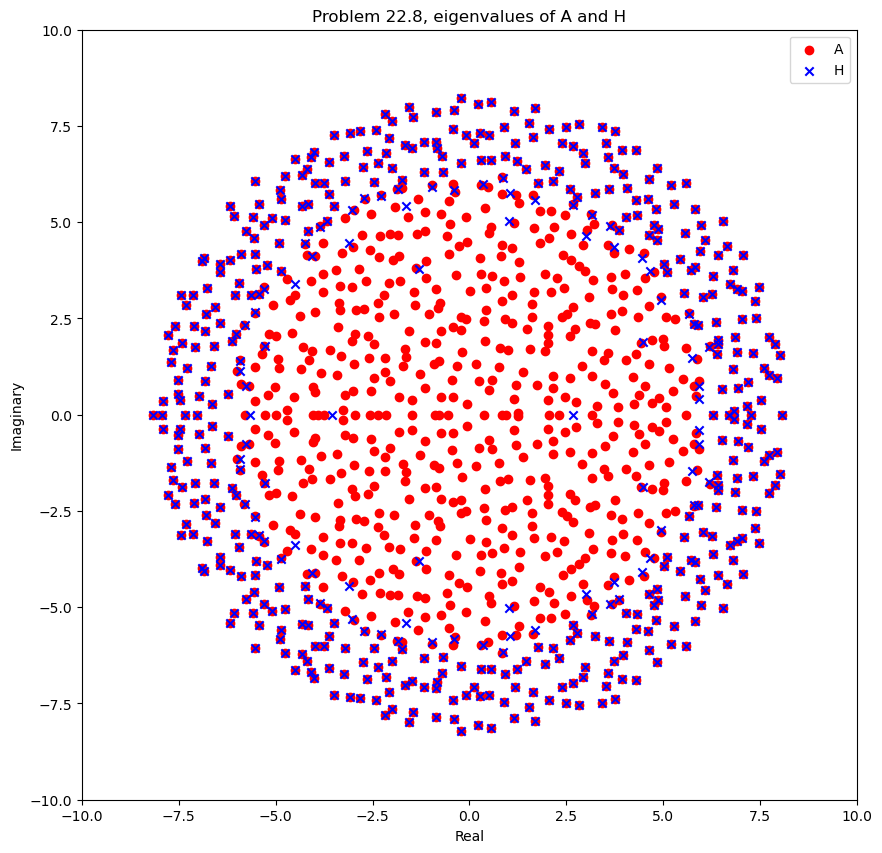

In [41]:
N=1000;m=500
A=sp.sparse.random(N,N,density=0.25).A
Q,H=ARNOLDI(A,np.random.rand(N),m)
egvalA=np.linalg.eigvals(A)
egvalH=np.linalg.eigvals(H[0:m,0:m])

plt.figure(figsize=(10,10))
plt.scatter(egvalA.real,egvalA.imag,c='r',marker='o',label='A')
plt.scatter(egvalH.real,egvalH.imag,c='b',marker='x',label='H')
plt.legend()
plt.title('Problem 22.8, eigenvalues of A and H')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()
